In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow tensorflow.gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Cat vs Dog'

In [5]:
for ic in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, ic)):
    image_path=os.path.join(data_dir, ic, image)

    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)

      if tip not in image_ext:
        print("Image is not of desired extension",format(image_path))
        os.remove(image_path)


    except Exception as e:
      print("issue with the image")
      #os.remove(image_path)

issue with the image
issue with the image


In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Cat vs Dog')

Found 12866 files belonging to 2 classes.


In [15]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/Cat vs Dog/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Colab Notebooks/Cat vs Dog/test1',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 376 files belonging to 1 classes.
Found 12490 files belonging to 1 classes.


In [16]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [17]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
12/12 [==============================] - 975s 87s/step - loss: 0.2839 - accuracy: 0.9654 - val_loss: 0.1048 - val_accuracy: 0.9721
Epoch 2/10
12/12 [==============================] - 482s 43s/step - loss: 0.3609 - accuracy: 0.9867 - val_loss: 1.5592e-05 - val_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 482s 43s/step - loss: 0.1917 - accuracy: 0.9973 - val_loss: 1.0772e-14 - val_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 483s 43s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1946e-18 - val_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 489s 44s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.8745e-22 - val_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 483s 44s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.1888e-24 - val_accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 438s 39s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 

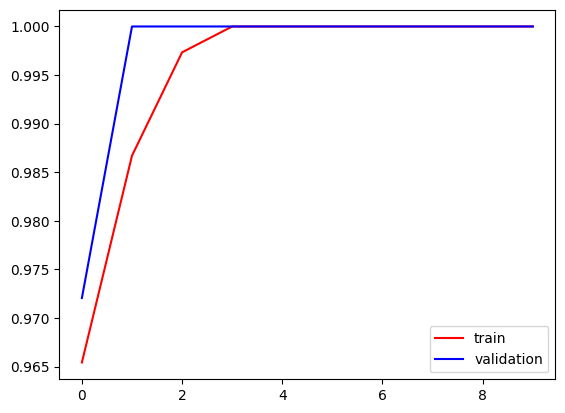

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

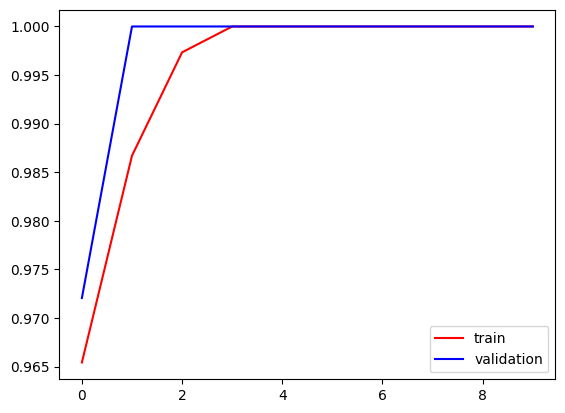

In [22]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

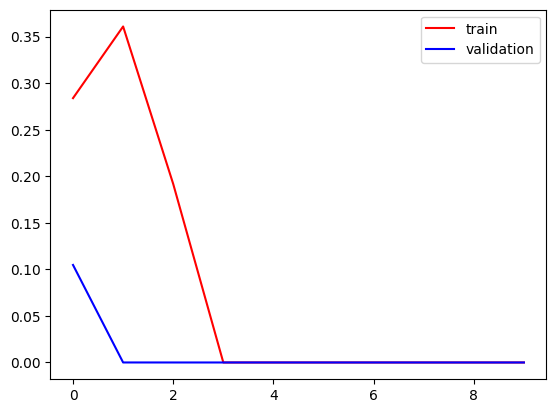

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

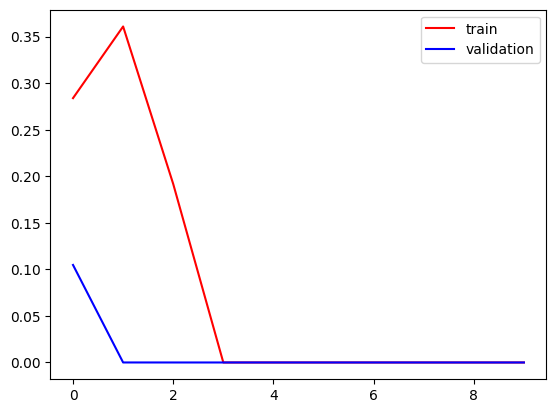

In [24]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [26]:
test_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cat vs Dog/test1/test1/10020.jpg')

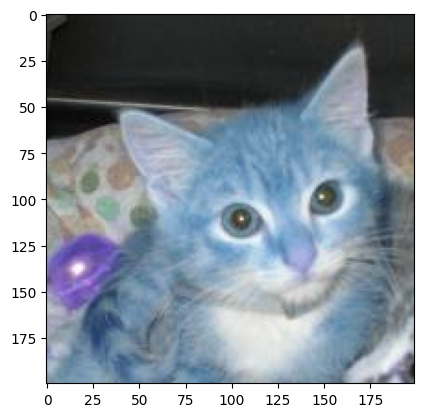

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(200, 199, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [9]:
import tensorflow as tf
import os

In [10]:
# Avoid OOM error by setting up GPU consumption

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)


In [11]:
tf.config.list_physical_devices('GPU')

[]

In [13]:
import cv2
import imghdr

In [12]:
image_ext = ['jpeg','jpg','bmp','png']

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 44ms/step


array([[0.]], dtype=float32)